Connected to base (Python 3.11.5)

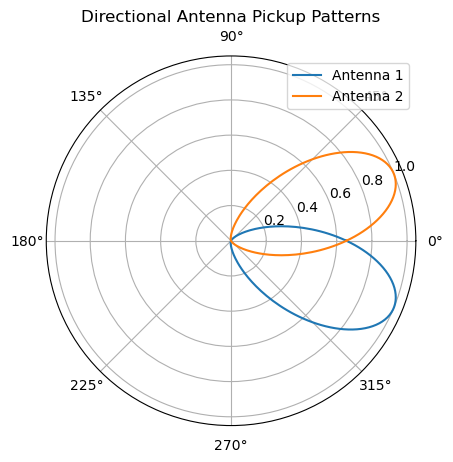

TypeError: get_field_strength_at_position() missing 1 required positional argument: 'position'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rf_simulation as rfSim

from testing import create_antenna_pair

import antenna as ant

import extras as ex



# Fixed Location
emitter_position = np.array([0, 0, 0])

# Dynamic Location
antenna_pairs = {
    "pos": [250, 0, 250],
    "dir": [1, 0, 0],
    "dis": 1
}

# Target vectors
measured_vectors = [{"origin" : [0,0,0], "direction" : [0,0,0]}]


#----------------------#

# Environment set
space_dim = 500
resolution = 100

# Emitter set
emitter_position = np.array([250, 250, 500])
emitter_power = 20.0

# Antenna pattern
antena_std_dev = 0.3


#----------------------#
#----------------------#


# Step 1: Create environment with emitter
environment = rfSim.setup_3d_space(space_dim, resolution)

emitters = [{"position": emitter_position, "power": emitter_power}]

field = rfSim.compute_rf_field_strength(emitters, environment[0], environment[1], environment[2])


# --- ex.plot_rf_field_strength(field, environment)


# Step 2: Create antenna pairs

antPos, antDir = create_antenna_pair(antenna_pairs["pos"], antenna_pairs["dis"], antenna_pairs["dir"], angle=np.pi/4)

ant.plot_antenna_patterns(antDir, antena_std_dev)


ex.get_field_strength_at_position(field, environment,antPos[0])

ant.directional_antenna(ex.get_field_strength_at_position(field, antPos[0]), emitter_position, antPos[0], antDir[0], std_dev=antena_std_dev)

# Step 3: Calculate signal strength for each antenna pair

antSignal = []
for i in range(len(antPos)):
    antSignal.append(ant.directional_antenna(ex.get_field_strength_at_position(field, environment,antPos[i]), emitter_position, antPos[i], antDir[i], std_dev=antena_std_dev))


# Step 4: Calculate target vector from signal strength


# Step 5: Intercept target vectors to estimate source location

# Step 6: Plot results

In [ ]:
antPos[0]

array([250. ,  -0.5, 250. ])